In [1]:
import pandas as pd

In [2]:
file_path = '/Users/yoonjiha/Desktop/파란학기/bluesemesterdata/ver-test2'

In [3]:
df = pd.read_csv(file_path + "/chain-market.csv")
df

,_time,chainName,ath,athDate,atl,atlDate,cap,capChange24h,capChangeRatio24H,capRank,...,low24h,price,priceChangePercentage14d,priceChangePercentage1H,priceChangePercentage1Y,priceChangePercentage24H,priceChangePercentage30D,priceChangePercentage7d,supplyCirculating,totalVolume
0,2023-01-22T03:17:05.617Z,cosmos,44.45,2022-01-17T00:34:41.497Z,1.160000,2020-03-13T02:27:44.591Z,3859684388,147701676,3.97905,22,...,12.710000,13.230000,28.957470,-0.485600,-66.135479,4.076443,49.739968,6.656563,292586163.8,286045792
1,2023-01-22T04:00:02.782Z,cosmos,44.45,2022-01-17T00:34:41.497Z,1.160000,2020-03-13T02:27:44.591Z,3907744616,176277536,4.72408,22,...,12.740000,13.400000,30.548036,1.262951,-65.717793,5.109553,51.586867,7.972070,292586163.8,270717200
2,2023-01-22T05:00:02.824Z,cosmos,44.45,2022-01-17T00:34:41.497Z,1.160000,2020-03-13T02:27:44.591Z,3927643247,184235063,4.92159,22,...,12.790000,13.400000,30.600500,0.109195,-65.704016,4.756726,51.647786,8.015461,292586163.8,278476575
3,2023-01-22T06:00:03.313Z,cosmos,44.45,2022-01-17T00:34:41.497Z,1.160000,2020-03-13T02:27:44.591Z,3937783620,102299572,2.66719,22,...,12.930000,13.430000,30.878275,-0.008200,-65.631072,2.355746,51.970326,8.245199,292586163.8,256725694
4,2023-01-22T07:00:02.713Z,cosmos,44.45,2022-01-17T00:34:41.497Z,1.160000,2020-03-13T02:27:44.591Z,3924998829,104038978,2.72285,22,...,12.930000,13.400000,30.615193,-0.020446,-65.700158,2.552304,51.664846,8.027613,292586163.8,248758707
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10056,2023-05-08T07:00:03.646Z,osmosis,11.25,2022-03-04T05:12:18.707Z,0.678606,2023-01-01T05:30:08.710Z,404983121,-133274,-0.03290,103,...,0.698869,0.702410,-8.971425,0.211146,-81.515948,-0.091975,-10.970256,-10.630145,576419817.0,8394496
10057,2023-05-08T08:00:03.493Z,osmosis,11.25,2022-03-04T05:12:18.707Z,0.678606,2023-01-01T05:30:08.710Z,403448043,-670280,-0.16586,103,...,0.698869,0.700059,-9.276131,-0.328301,-81.577821,-0.197546,-11.268271,-10.929299,576419817.0,8384778
10058,2023-05-08T09:00:03.878Z,osmosis,11.25,2022-03-04T05:12:18.707Z,0.678606,2023-01-01T05:30:08.710Z,402169705,-1425917,-0.35330,103,...,0.697954,0.699504,-9.348001,-0.108675,-81.592415,-0.346475,-11.338563,-10.999859,576419817.0,8623022
10059,2023-05-08T10:00:03.496Z,osmosis,11.25,2022-03-04T05:12:18.707Z,0.678606,2023-01-01T05:30:08.710Z,403875678,753035,0.18680,103,...,0.696605,0.700127,-7.522812,0.080149,-80.316698,-0.052793,-9.789265,-9.837682,576419817.0,8790759


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10061 entries, 0 to 10060
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   _time                     10061 non-null  object 
 1   chainName                 10061 non-null  object 
 2   ath                       10061 non-null  float64
 3   athDate                   10061 non-null  object 
 4   atl                       10061 non-null  float64
 5   atlDate                   10061 non-null  object 
 6   cap                       10061 non-null  int64  
 7   capChange24h              10061 non-null  int64  
 8   capChangeRatio24H         10061 non-null  float64
 9   capRank                   10061 non-null  int64  
 10  change24h                 10061 non-null  float64
 11  changeRatio24H            10061 non-null  float64
 12  high24h                   10061 non-null  float64
 13  low24h                    10061 non-null  float64
 14  price 

In [5]:
df.chainName.unique()

array(['cosmos', 'juno', 'kava', 'osmosis'], dtype=object)

In [6]:
cos_df = pd.DataFrame()
juno_df = pd.DataFrame()
kava_df = pd.DataFrame()
osmo_df = pd.DataFrame()

## 7일 가격변화량ARIMA 예측

### 필요한 데이터만 뽑기

In [7]:
cos_df['date'] = df[df['chainName'] == 'cosmos']['_time'].values
cos_df['change'] = df[df['chainName'] == 'cosmos']['priceChangePercentage7d'].values

juno_df['date'] = df[df['chainName'] == 'juno']['_time'].values
juno_df['change'] = df[df['chainName'] == 'juno']['priceChangePercentage7d'].values

kava_df['date'] = df[df['chainName'] == 'kava']['_time'].values
kava_df['change'] = df[df['chainName'] == 'kava']['priceChangePercentage7d'].values

osmo_df['date'] = df[df['chainName'] == 'osmosis']['_time'].values
osmo_df['change'] = df[df['chainName'] == 'osmosis']['priceChangePercentage7d'].values

In [8]:
osmo_df

,date,change
0,2023-01-22T03:17:05.624Z,1.364371
1,2023-01-22T04:00:03.054Z,2.480676
2,2023-01-22T05:00:03.237Z,2.480087
3,2023-01-22T06:00:03.333Z,2.821756
4,2023-01-22T07:00:03.08Z,2.417073
...,...,...
2513,2023-05-08T07:00:03.646Z,-10.630145
2514,2023-05-08T08:00:03.493Z,-10.929299
2515,2023-05-08T09:00:03.878Z,-10.999859
2516,2023-05-08T10:00:03.496Z,-9.837682


In [9]:
cos_df['date'] = pd.to_datetime(cos_df['date'])
cos_df = cos_df.set_index('date')
juno_df['date'] = pd.to_datetime(juno_df['date'])
juno_df = juno_df.set_index('date')
kava_df['date'] = pd.to_datetime(kava_df['date'])
kava_df = kava_df.set_index('date')
osmo_df['date'] = pd.to_datetime(osmo_df['date'])
osmo_df = osmo_df.set_index('date')


cos_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2516 entries, 2023-01-22 03:17:05.617000+00:00 to 2023-05-08 11:00:03.355000+00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   change  2516 non-null   float64
dtypes: float64(1)
memory usage: 39.3 KB


In [10]:
osmo_df

,change
date,
2023-01-22 03:17:05.624000+00:00,1.364371
2023-01-22 04:00:03.054000+00:00,2.480676
2023-01-22 05:00:03.237000+00:00,2.480087
2023-01-22 06:00:03.333000+00:00,2.821756
2023-01-22 07:00:03.080000+00:00,2.417073
...,...
2023-05-08 07:00:03.646000+00:00,-10.630145
2023-05-08 08:00:03.493000+00:00,-10.929299
2023-05-08 09:00:03.878000+00:00,-10.999859


In [11]:
import matplotlib.pyplot as plt

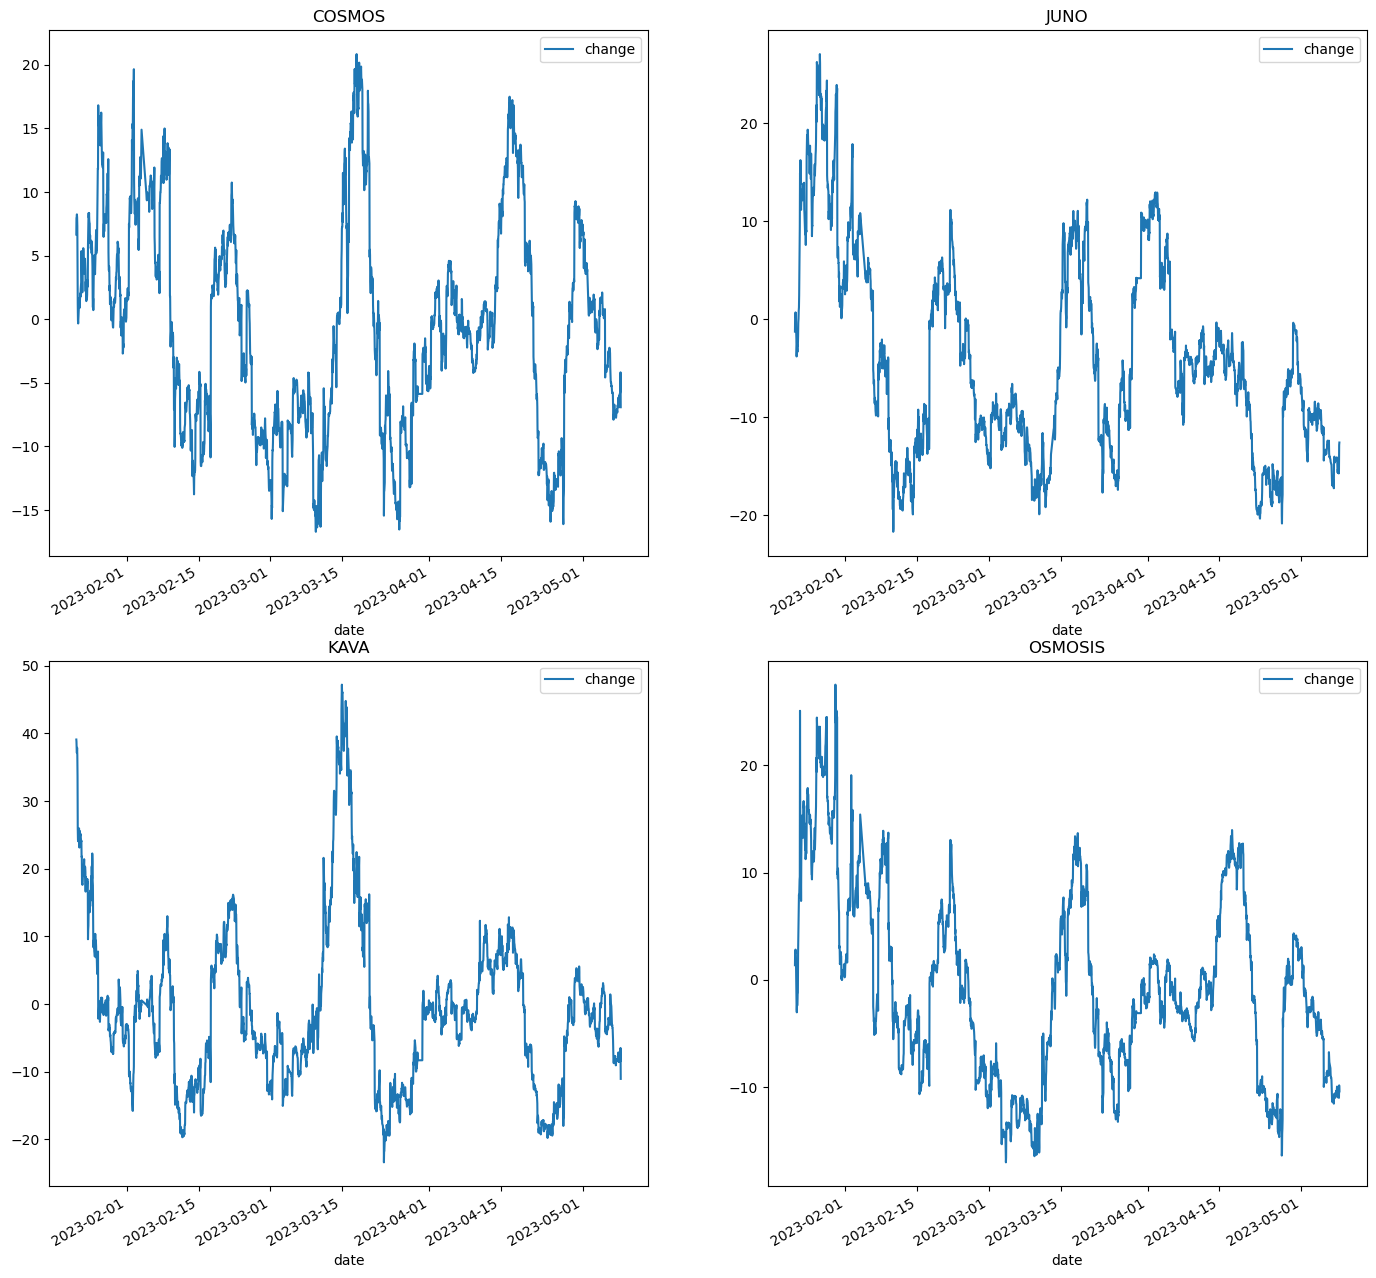

In [12]:
fig, axs = plt.subplots(2,2, figsize=(17,17))
ax1, ax2, ax3, ax4 = axs.flatten()

ax1 = cos_df.plot(ax=ax1)
ax1.set_title('COSMOS')
ax2 = juno_df.plot(ax=ax2)
ax2.set_title('JUNO')
ax3 = kava_df.plot(ax=ax3)
ax3.set_title('KAVA')
ax4 = osmo_df.plot(ax=ax4)
ax4.set_title('OSMOSIS')

plt.show()

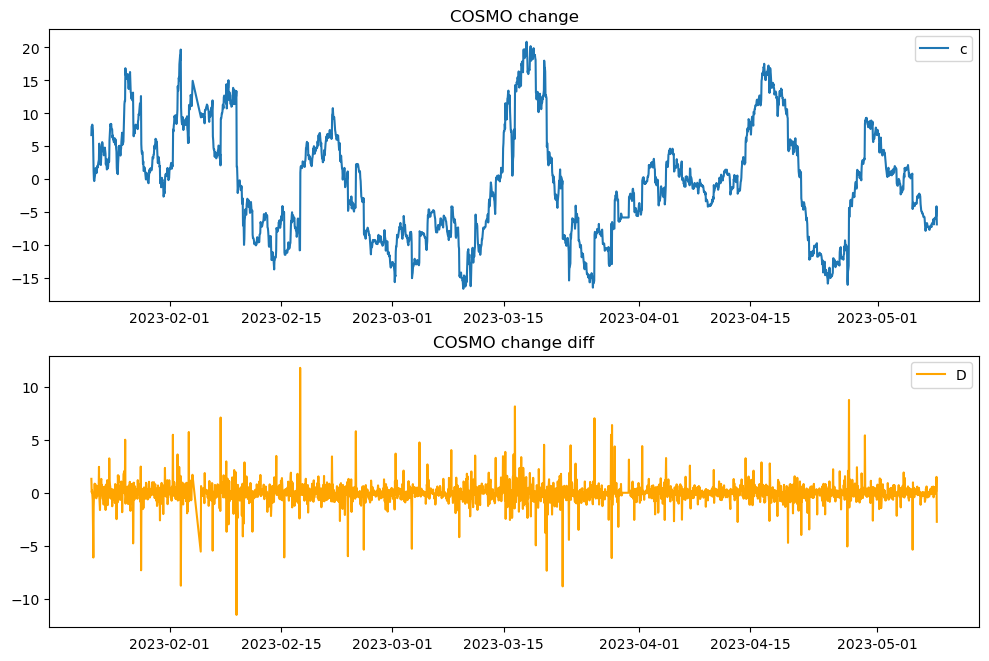

In [23]:
import matplotlib.pyplot as plt
# cap 차분 데이터
diff_series = cos_df.change.diff().dropna()

plt.figure(figsize=(12,12))
plt.subplot(311)
plt.title('COSMO change')
plt.plot(cos_df)
plt.legend('cap data')
plt.subplot(312)
plt.title('COSMO change diff')
plt.plot(diff_series, 'orange')
plt.legend('Diff Data')


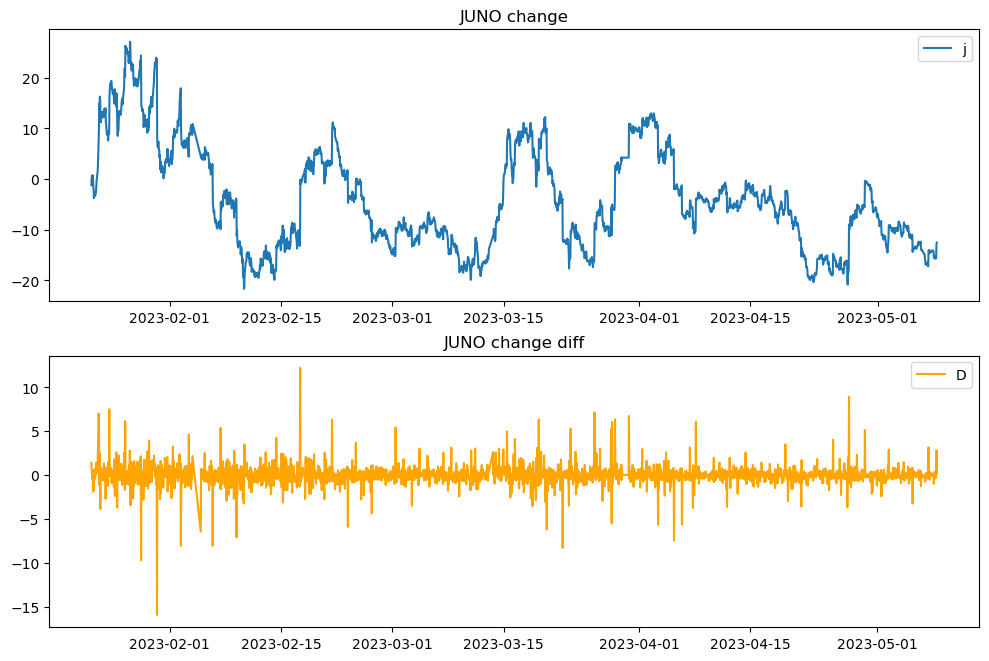

In [24]:
diff_series = juno_df.change.diff().dropna()

plt.figure(figsize=(12,12))
plt.subplot(311)
plt.title('JUNO change')
plt.plot(juno_df)
plt.legend('juno Data')
plt.subplot(312)
plt.title('JUNO change diff')
plt.plot(diff_series, 'orange')
plt.legend('Diff Data')


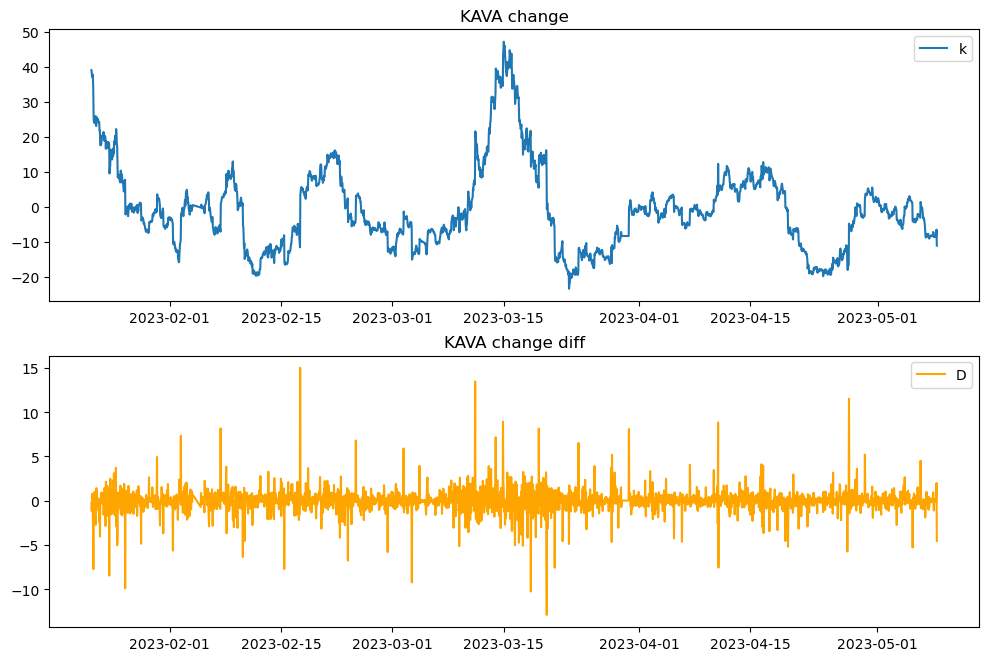

In [25]:
diff_series = kava_df.change.diff().dropna()

plt.figure(figsize=(12,12))
plt.subplot(311)
plt.title('KAVA change')
plt.plot(kava_df)
plt.legend('kava Data')
plt.subplot(312)
plt.title('KAVA change diff')
plt.plot(diff_series, 'orange')
plt.legend('Diff Data')


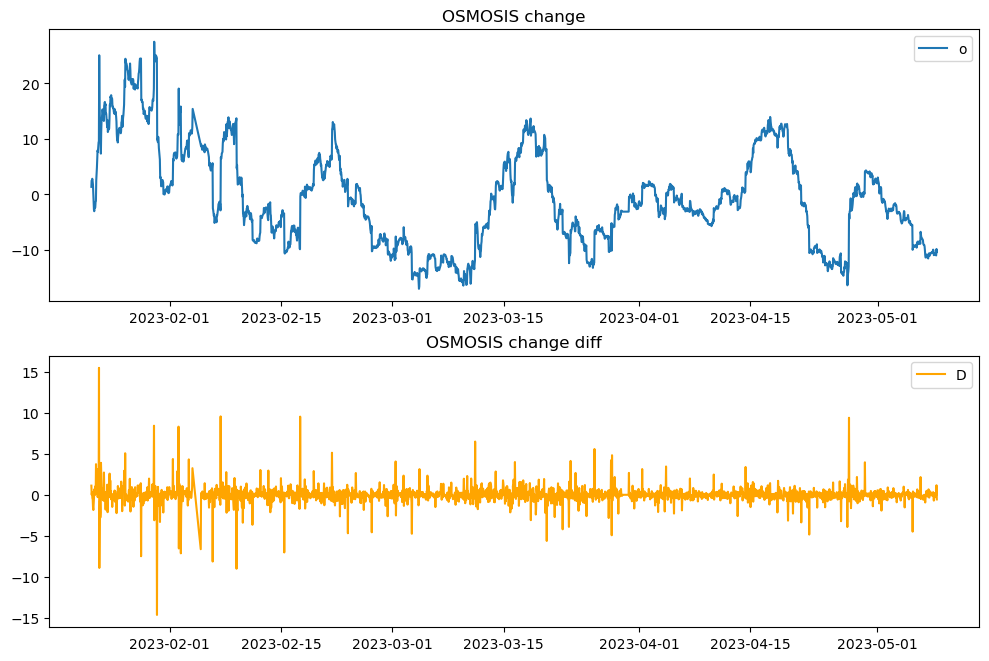

In [26]:
diff_series = osmo_df.change.diff().dropna()

plt.figure(figsize=(12,12))
plt.subplot(311)
plt.title('OSMOSIS change')
plt.plot(osmo_df)
plt.legend('osmosis Data')
plt.subplot(312)
plt.title('OSMOSIS change diff')
plt.plot(diff_series, 'orange')
plt.legend('Diff Data')


### ARIMA 모수 설정

In [27]:
!pip install pmdarima

In [28]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

### 정상성 test

In [13]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss

### COSMOS ARIMA

In [14]:
def adf_test(df):
    result = adfuller(df.values)
    print('ADF Statistics: %f' %result[0])
    print('p-value: %f' %result[1])
    print('Critical values: ')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))
        
        
print('ADF Test: time series')
adf_test(cos_df)
adf_test(cos_df['change'].diff().dropna())

ADF Test: time series
ADF Statistics: -2.827090
p-value: 0.054507
Critical values: 
	1%: -3.433
	5%: -2.863
	10%: -2.567
ADF Statistics: -11.717877
p-value: 0.000000
Critical values: 
	1%: -3.433
	5%: -2.863
	10%: -2.567


In [19]:
def kpss_test(df):
    statistic, p_value, n_lags, critical_values = kpss(df.values)
    
    print(f'KPSS statistics: {statistic}')
    print(f'p_value: {p_value}')
    print(f'num lags: {n_lags}')
    print('Critial Values: ')
    for key, value in critical_values.items():
        print(f' {key} : {value}')

print('KPSS Test: time series')
kpss_test(cos_df['change'])
kpss_test(cos_df['change'].diff().dropna())
# 0.05보다 작으면 안정적이지 않다는 뜻

KPSS Test: time series
KPSS statistics: 0.35964471895666955
p_value: 0.09454969010488382
num lags: 30
Critial Values: 
 10% : 0.347
 5% : 0.463
 2.5% : 0.574
 1% : 0.739
KPSS statistics: 0.026454222362104058
p_value: 0.1
num lags: 8
Critial Values: 
 10% : 0.347
 5% : 0.463
 2.5% : 0.574
 1% : 0.739


/Users/yoonjiha/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


/Users/yoonjiha/anaconda3/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


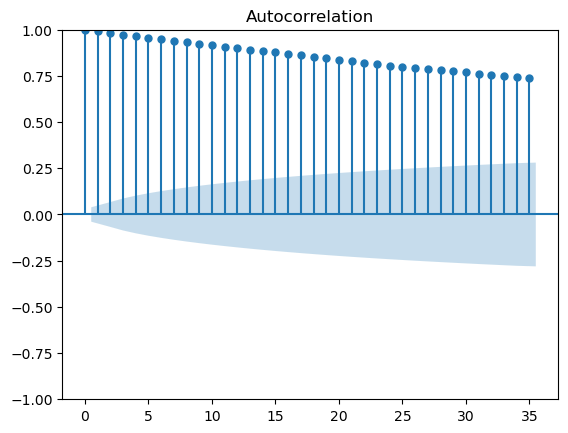

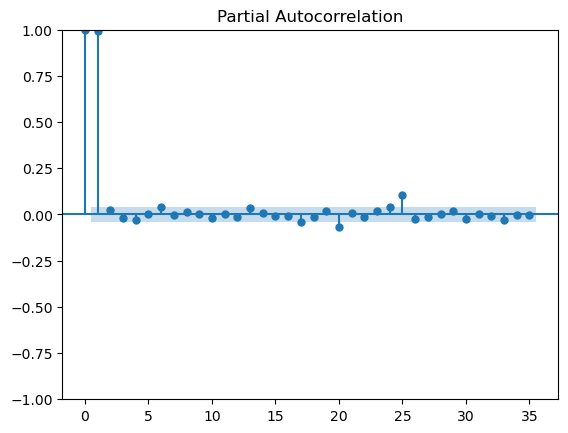

In [29]:
plot_acf(cos_df)
plot_pacf(cos_df)
plt.show()

/Users/yoonjiha/anaconda3/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


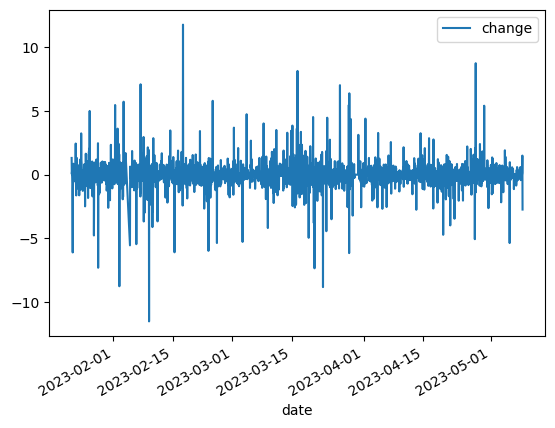

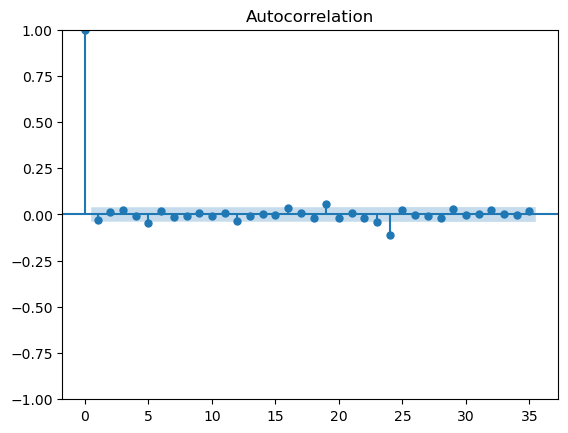

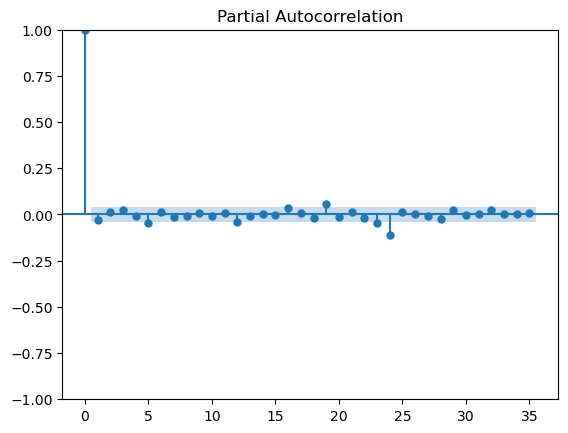

In [30]:
diff_1=cos_df.diff(periods=1).iloc[1:]
diff_1.plot()
plot_acf(diff_1)
plot_pacf(diff_1)
plt.show()

In [38]:
from pmdarima.arima import auto_arima

# 파라미터 값 찾기
model_arima = auto_arima(cos_df,trace=True, error_action='ignore', start_p=1,start_q=1,max_p=3,max_q=3,suppress_warnings=True,stepwise=False,seasonal=False)

model_arima.fit(cos_df)

 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=7622.884, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=7622.941, Time=0.15 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=7624.476, Time=0.21 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=7625.170, Time=0.27 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=7622.893, Time=0.12 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=7624.772, Time=0.76 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=7626.168, Time=0.71 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=7627.083, Time=0.69 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=7624.568, Time=0.18 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=7626.279, Time=0.55 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=7616.286, Time=2.10 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=7624.341, Time=2.61 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=7625.203, Time=0.22 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=7627.156, Time=0.60 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=7624.333, Time=2.31 sec

Best mode

ARIMA(order=(2, 1, 2), scoring_args={}, suppress_warnings=True)

In [32]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(cos_df, test_size=0.2, shuffle=False)

In [39]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_predict
import statsmodels.api as sm
import sys

model = SARIMAX(train_df, order=(2,0,2), trend='t')
# trend = t: 시간에 따른 추세 변화 모델링

model_fit = model.fit(full_output = True, disp = 1)
print(model_fit.summary())

/Users/yoonjiha/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yoonjiha/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.55230D+00    |proj g|=  3.14692D+01

At iterate    1    f=  1.55229D+00    |proj g|=  2.49791D+01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      2     44      2     0     0   2.498D+01   1.552D+00
  F =   1.5522933642895045     

ABNORMAL_TERMINATION_IN_LNSRCH                              
                               SARIMAX Results                                
Dep. Variable:                 change   No. Observations:                 2012
Model:               SARIMAX(2, 0, 2)   Log Likelihood               -3123.214
Date:                Fri, 19 May 2023   AIC                           6258.428
Time:                        00:02:08   BIC                           6292.070
Sample:                     

/Users/yoonjiha/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


<Axes: xlabel='date'>

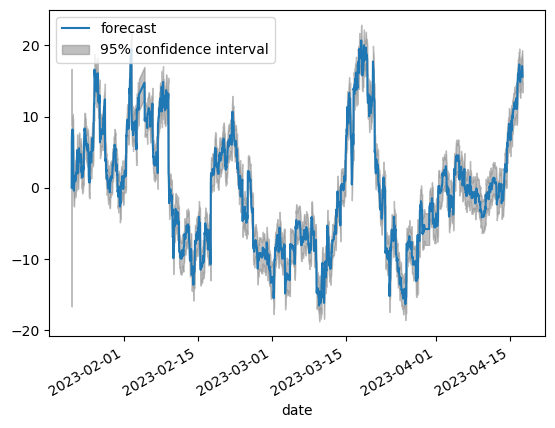

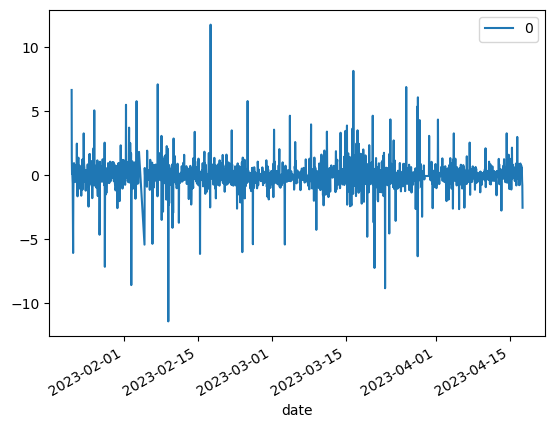

In [40]:
fig, ax = plt.subplots()
fig = plot_predict(model_fit, ax = ax)# 학습데이터 예측 결과
res = pd.DataFrame(model_fit.resid)# 잔차 변동 시각화
res.plot()

In [41]:
# test 데이터 개수만큼 예측값 뽑기
fore = model_fit.get_forecast(steps=len(test_df.index), alpha=0.05).summary_frame()
fore

/Users/yoonjiha/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


change,mean,mean_se,mean_ci_lower,mean_ci_upper
2012,12.984027,1.134517,10.760415,15.207640
2013,12.809820,1.581956,9.709243,15.910397
2014,12.662517,1.934909,8.870164,16.454870
2015,12.530686,2.233662,8.152790,16.908582
2016,12.407946,2.495312,7.517225,17.298667
...,...,...,...,...
2511,0.661641,8.514292,-16.026065,17.349347
2512,0.660798,8.514299,-16.026921,17.348517
2513,0.659965,8.514305,-16.027766,17.347697
2514,0.659142,8.514312,-16.028602,17.346887


In [42]:
fc = tuple(fore['mean'].values) # 예측값
se = tuple(fore['mean_se'].values) # 표준오차
lower_coef = tuple(fore['mean_ci_lower'].values) # 신뢰구간 최소
upper_coef = tuple(fore['mean_ci_upper'].values) # 신뢰구간 최대

# 예측값 인덱스 넣기
fc_data = pd.Series(fc, index = test_df.index)

# 신뢰구간 인덱스 넣기
lower_data = pd.Series(lower_coef, index = test_df.index)
upper_data = pd.Series(upper_coef, index = test_df.index )

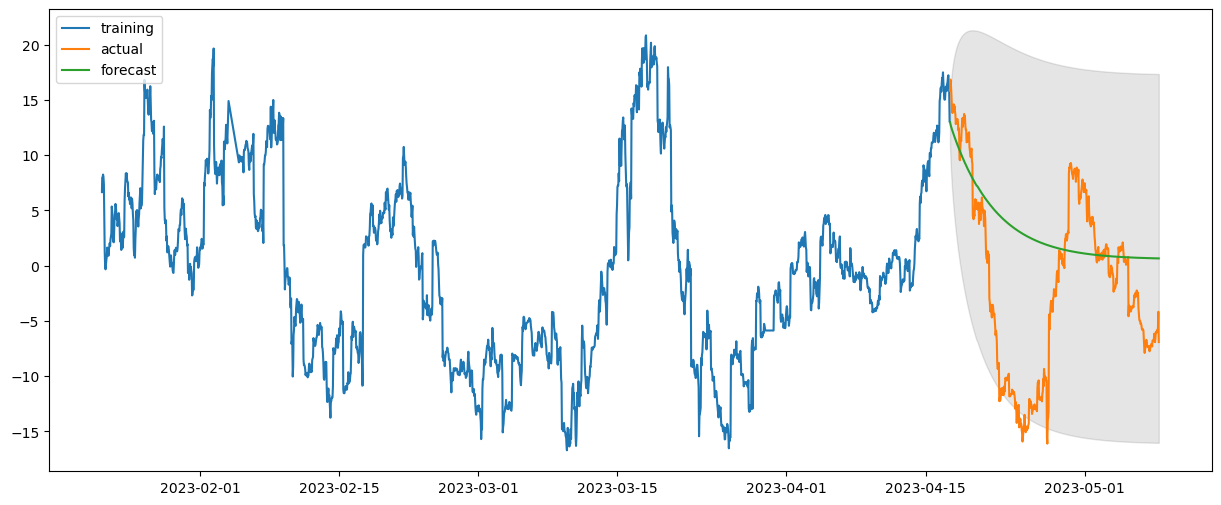

In [43]:
#시각화 
plt.figure(figsize =(15, 6))
plt.plot(train_df, label = 'training')
plt.plot(test_df, label = 'actual')
plt.plot(fc_data, label = 'forecast')
plt.fill_between(test_df.index, lower_data, upper_data, color = 'black', alpha = 0.1)
plt.legend(loc = 'upper left')
plt.show()

### JUNO ARIMA

In [47]:
adf_test(juno_df['change'])
adf_test(juno_df['change'].diff().dropna())

ADF Statistics: -2.603073
p-value: 0.092364
Critical values: 
	1%: -3.433
	5%: -2.863
	10%: -2.567
ADF Statistics: -12.396692
p-value: 0.000000
Critical values: 
	1%: -3.433
	5%: -2.863
	10%: -2.567


In [48]:
kpss_test(juno_df['change'])
kpss_test(juno_df['change'].diff().dropna())

KPSS statistics: 1.2961235457425002
p_value: 0.01
num lags: 30
Critial Values: 
 10% : 0.347
 5% : 0.463
 2.5% : 0.574
 1% : 0.739
KPSS statistics: 0.02822904732425262
p_value: 0.1
num lags: 5
Critial Values: 
 10% : 0.347
 5% : 0.463
 2.5% : 0.574
 1% : 0.739


/Users/yoonjiha/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(
/Users/yoonjiha/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


/Users/yoonjiha/anaconda3/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


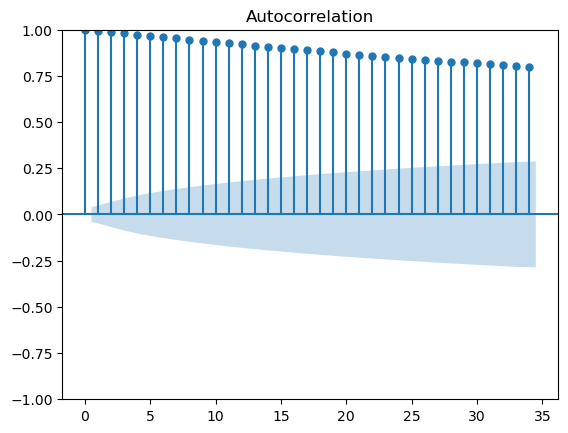

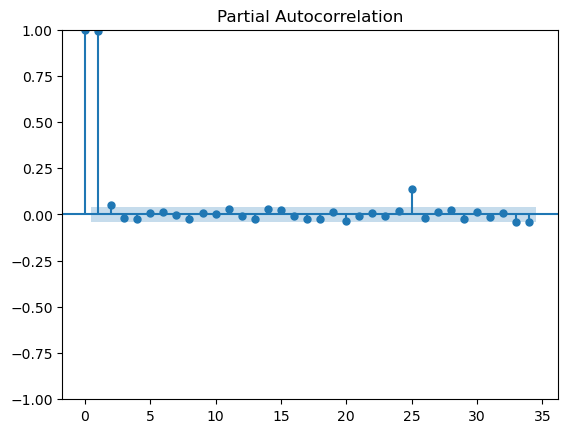

In [49]:
plot_acf(juno_df)
plot_pacf(juno_df)
plt.show()

/Users/yoonjiha/anaconda3/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


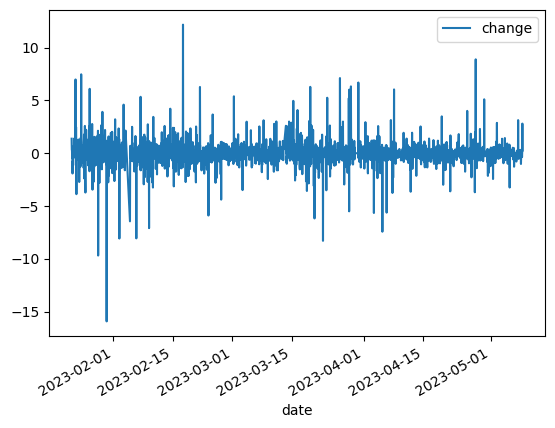

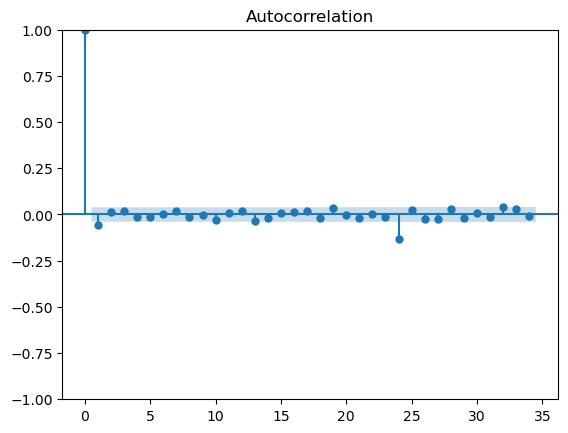

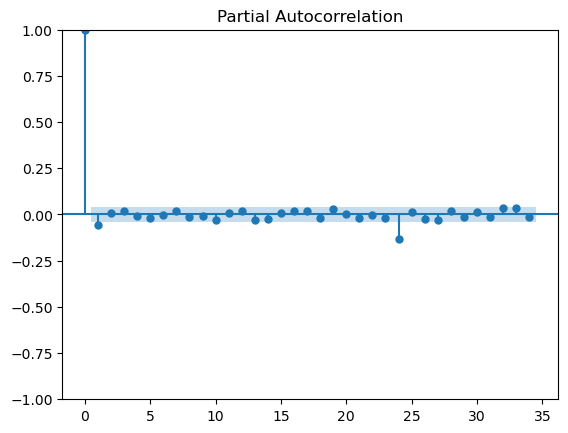

In [50]:
diff_1=juno_df.diff(periods=1).iloc[1:]
diff_1.plot()
plot_acf(diff_1)
plot_pacf(diff_1)
plt.show() 

In [51]:
from pmdarima.arima import auto_arima

# 파라미터 값 찾기
model_arima = auto_arima(juno_df,trace=True, error_action='ignore', start_p=1,start_q=1,max_p=3,max_q=3,suppress_warnings=True,stepwise=False,seasonal=False)

model_arima.fit(juno_df)


 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=7984.182, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=7978.478, Time=0.15 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=7979.968, Time=0.17 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=7981.209, Time=0.24 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=7978.300, Time=0.10 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=7980.185, Time=0.20 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=7981.748, Time=0.19 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=7983.008, Time=1.16 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=7980.098, Time=0.16 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=7981.874, Time=0.58 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=7979.580, Time=1.26 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=7974.898, Time=2.59 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=7981.125, Time=0.22 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=7983.030, Time=0.64 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=2.38 sec

Best model:  A

ARIMA(order=(2, 1, 3), scoring_args={}, suppress_warnings=True)

In [81]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(juno_df, test_size=0.2, shuffle=False)

In [53]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_predict
import statsmodels.api as sm
import sys

model = SARIMAX(train_df, order=(2,1,3), trend='t')
# trend = t: 시간에 따른 추세 변화 모델링

model_fit = model.fit(full_output = True, disp = 1)
print(model_fit.summary())

/Users/yoonjiha/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yoonjiha/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.55236D+00    |proj g|=  1.79158D+00

At iterate    1    f=  1.55236D+00    |proj g|=  1.79158D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      1     20      1     0     0   1.792D+00   1.552D+00
  F =   1.5523603582324412     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
                               SARIMAX Results                                
Dep. Variable:                 change   No. Observati


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


<Axes: xlabel='date'>

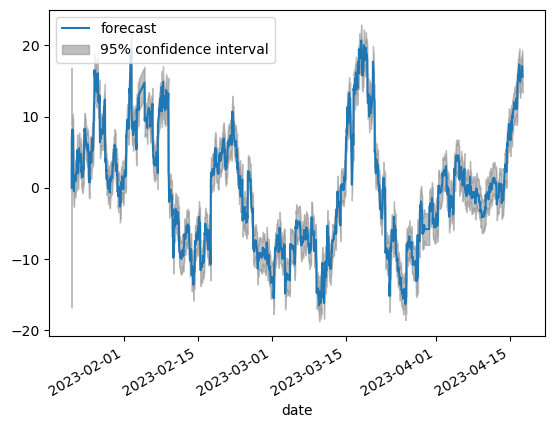

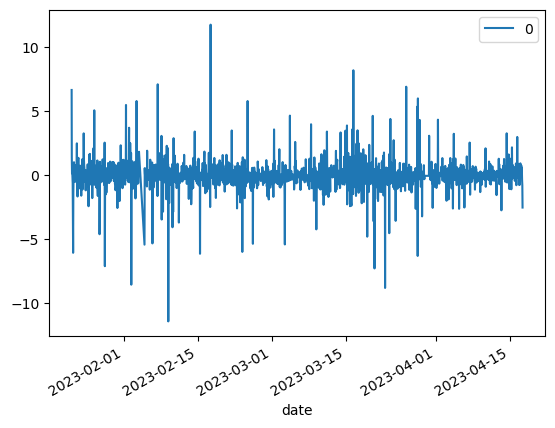

In [54]:
fig, ax = plt.subplots()
fig = plot_predict(model_fit, ax = ax)# 학습데이터 예측 결과
res = pd.DataFrame(model_fit.resid)# 잔차 변동 시각화
res.plot()

In [55]:
# test 데이터 개수만큼 예측값 뽑기
fore = model_fit.get_forecast(steps=len(test_df.index), alpha=0.05).summary_frame()
fore

/Users/yoonjiha/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


change,mean,mean_se,mean_ci_lower,mean_ci_upper
2012,12.988931,1.134951,10.764468,15.213394
2013,12.813818,1.579264,9.718518,15.909118
2014,12.652499,1.930594,8.868603,16.436395
2015,12.565545,2.234773,8.185470,16.945619
2016,12.446215,2.492648,7.560714,17.331716
...,...,...,...,...
2511,0.615546,8.590081,-16.220704,17.451795
2512,0.614485,8.590091,-16.221783,17.450753
2513,0.613435,8.590100,-16.222851,17.449722
2514,0.612397,8.590109,-16.223907,17.448702


In [56]:
fc = tuple(fore['mean'].values) # 예측값
se = tuple(fore['mean_se'].values) # 표준오차
lower_coef = tuple(fore['mean_ci_lower'].values) # 신뢰구간 최소
upper_coef = tuple(fore['mean_ci_upper'].values) # 신뢰구간 최대

# 예측값 인덱스 넣기
fc_data = pd.Series(fc, index = test_df.index)

# 신뢰구간 인덱스 넣기
lower_data = pd.Series(lower_coef, index = test_df.index)
upper_data = pd.Series(upper_coef, index = test_df.index )

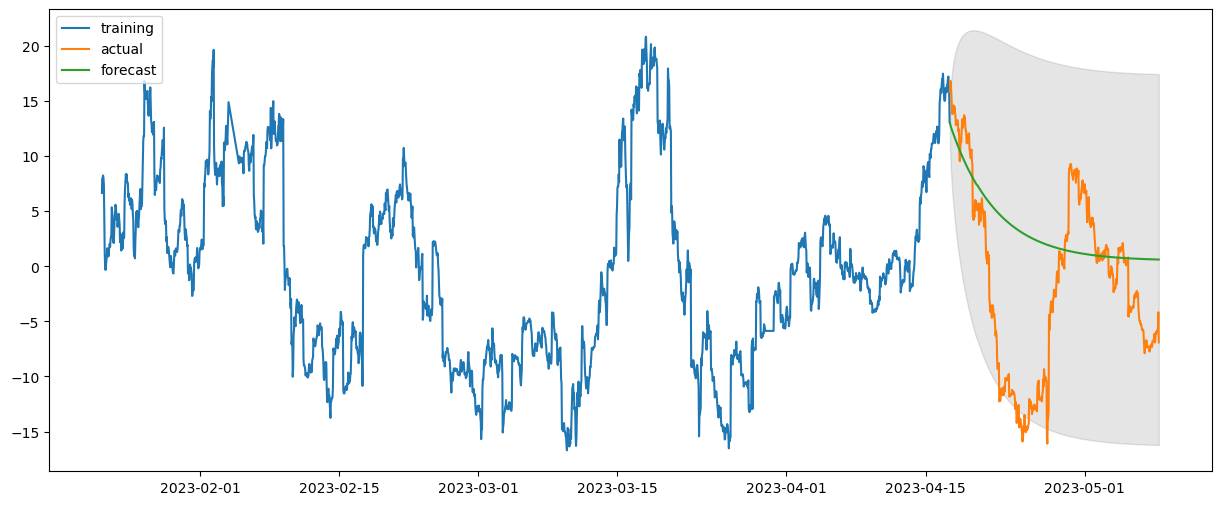

In [57]:
#시각화 
plt.figure(figsize =(15, 6))
plt.plot(train_df, label = 'training')
plt.plot(test_df, label = 'actual')
plt.plot(fc_data, label = 'forecast')
plt.fill_between(test_df.index, lower_data, upper_data, color = 'black', alpha = 0.1)
plt.legend(loc = 'upper left')
plt.show()

### KAVA ARIMA

In [58]:
adf_test(kava_df['change'])
adf_test(kava_df['change'].diff().dropna())

ADF Statistics: -3.745922
p-value: 0.003512
Critical values: 
	1%: -3.433
	5%: -2.863
	10%: -2.567
ADF Statistics: -51.562698
p-value: 0.000000
Critical values: 
	1%: -3.433
	5%: -2.863
	10%: -2.567


In [59]:
kpss_test(kava_df['change'])
kpss_test(kava_df['change'].diff().dropna())

KPSS statistics: 0.26301022725900736
p_value: 0.1
num lags: 30
Critial Values: 
 10% : 0.347
 5% : 0.463
 2.5% : 0.574
 1% : 0.739
KPSS statistics: 0.11986923551163162
p_value: 0.1
num lags: 7
Critial Values: 
 10% : 0.347
 5% : 0.463
 2.5% : 0.574
 1% : 0.739


/Users/yoonjiha/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(
/Users/yoonjiha/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


/Users/yoonjiha/anaconda3/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


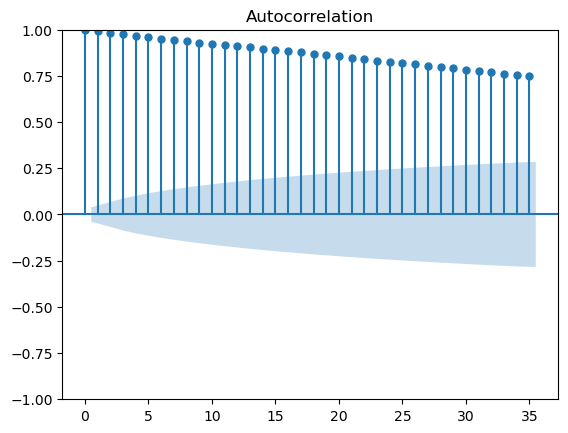

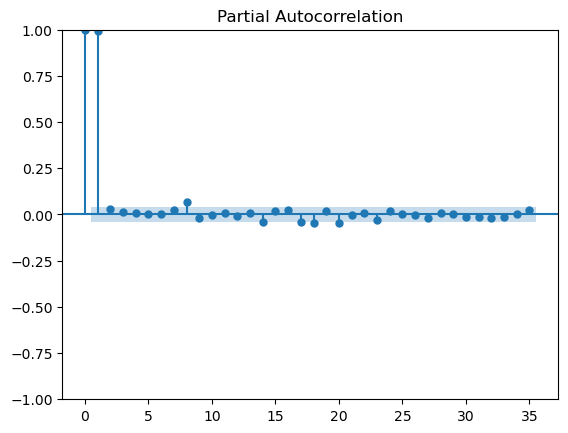

In [60]:
plot_acf(kava_df)
plot_pacf(kava_df)
plt.show()

/Users/yoonjiha/anaconda3/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


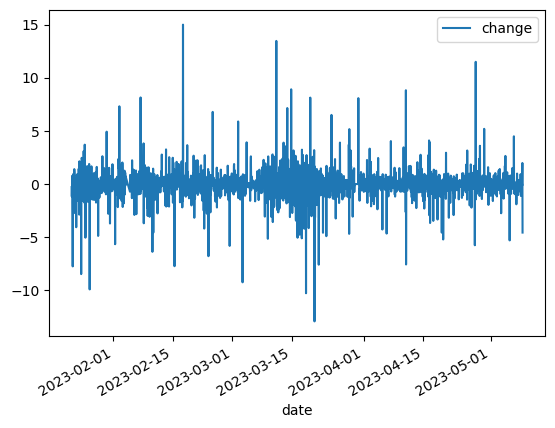

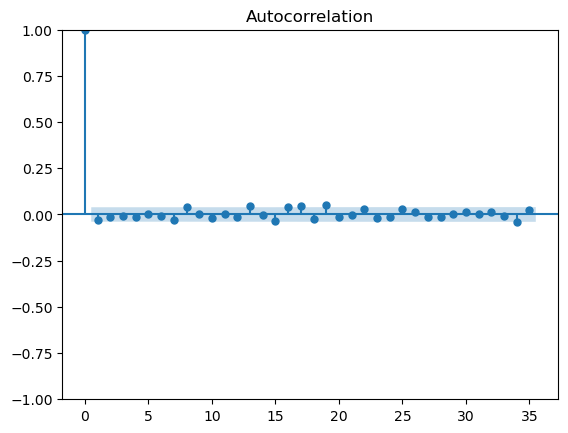

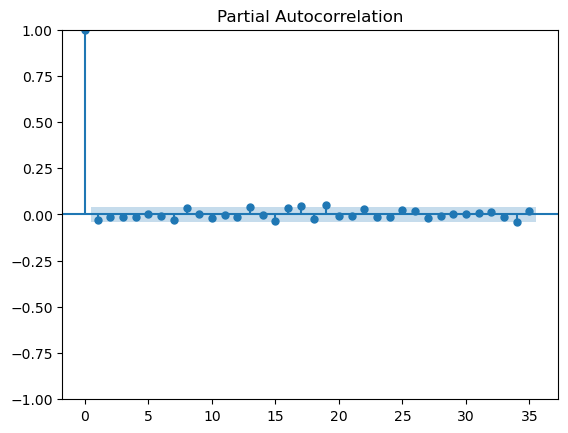

In [61]:
diff_1=kava_df.diff(periods=1).iloc[1:]
diff_1.plot()
plot_acf(diff_1)
plot_pacf(diff_1)
plt.show() 

In [62]:
from pmdarima.arima import auto_arima

# 파라미터 값 찾기
model_arima = auto_arima(kava_df,trace=True, error_action='ignore', start_p=1,start_q=1,max_p=3,max_q=3,suppress_warnings=True,stepwise=False,seasonal=False)

model_arima.fit(kava_df)


 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=8836.718, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=8836.416, Time=0.13 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=8837.924, Time=0.19 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=8839.592, Time=0.24 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=8836.480, Time=0.12 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=8837.147, Time=0.48 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=8839.123, Time=0.55 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=8841.066, Time=0.93 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=8837.989, Time=0.18 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=8839.123, Time=0.69 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=8841.125, Time=0.32 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=8842.936, Time=1.07 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=8839.667, Time=0.22 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=8841.067, Time=1.17 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=8842.027, Time=1.56 sec

Best mode

ARIMA(order=(0, 1, 1), scoring_args={}, suppress_warnings=True)

In [63]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(kava_df, test_size=0.2, shuffle=False)

In [64]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_predict
import statsmodels.api as sm
import sys

model = SARIMAX(train_df, order=(0,1,1), trend='t')
# trend = t: 시간에 따른 추세 변화 모델링

model_fit = model.fit(full_output = True, disp = 1)
print(model_fit.summary())

/Users/yoonjiha/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yoonjiha/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.80215D+00    |proj g|=  3.50188D+00

At iterate    1    f=  1.80215D+00    |proj g|=  3.34608D+00

At iterate    2    f=  1.80215D+00    |proj g|=  3.34557D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      2     28      1     0     0   3.346D+00   1.802D+00
  F =   1.8021502778163503     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
                               SARIMAX Results                        


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


<Axes: xlabel='date'>

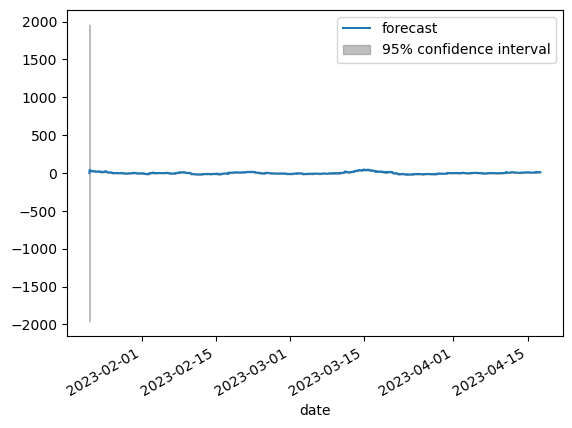

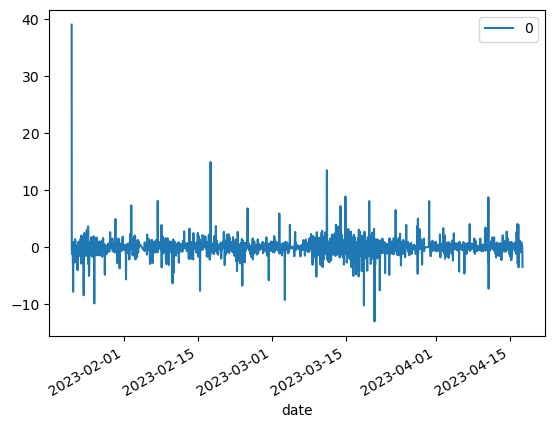

In [65]:
fig, ax = plt.subplots()
fig = plot_predict(model_fit, ax = ax)# 학습데이터 예측 결과
res = pd.DataFrame(model_fit.resid)# 잔차 변동 시각화
res.plot()

In [66]:
# test 데이터 개수만큼 예측값 뽑기
fore = model_fit.get_forecast(steps=len(test_df.index), alpha=0.05).summary_frame()
fore

/Users/yoonjiha/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


change,mean,mean_se,mean_ci_lower,mean_ci_upper
2015,7.702101,1.469351,4.822226,10.581975
2016,7.712807,2.044983,3.704714,11.720900
2017,7.723519,2.490967,2.841313,12.605725
2018,7.734236,2.868428,2.112220,13.356252
2019,7.744959,3.201694,1.469754,14.020164
...,...,...,...,...
2514,13.704551,31.805935,-48.633936,76.043038
2515,13.717908,31.837721,-48.682879,76.118694
2516,13.731270,31.869475,-48.731753,76.194293
2517,13.744637,31.901197,-48.780561,76.269835


In [67]:
fc = tuple(fore['mean'].values) # 예측값
se = tuple(fore['mean_se'].values) # 표준오차
lower_coef = tuple(fore['mean_ci_lower'].values) # 신뢰구간 최소
upper_coef = tuple(fore['mean_ci_upper'].values) # 신뢰구간 최대

# 예측값 인덱스 넣기
fc_data = pd.Series(fc, index = test_df.index)

# 신뢰구간 인덱스 넣기
lower_data = pd.Series(lower_coef, index = test_df.index)
upper_data = pd.Series(upper_coef, index = test_df.index )

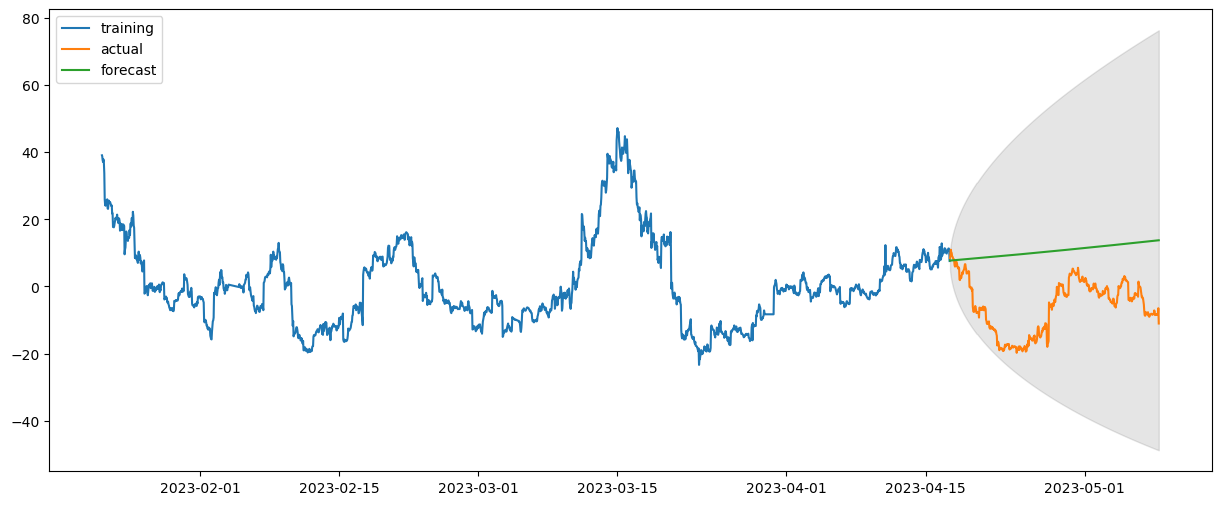

In [68]:
#시각화 
plt.figure(figsize =(15, 6))
plt.plot(train_df, label = 'training')
plt.plot(test_df, label = 'actual')
plt.plot(fc_data, label = 'forecast')
plt.fill_between(test_df.index, lower_data, upper_data, color = 'black', alpha = 0.1)
plt.legend(loc = 'upper left')
plt.show()

### OSMOSIS ARIMA

In [69]:
adf_test(osmo_df['change'])
adf_test(osmo_df['change'].diff().dropna())

ADF Statistics: -2.855703
p-value: 0.050747
Critical values: 
	1%: -3.433
	5%: -2.863
	10%: -2.567
ADF Statistics: -11.200911
p-value: 0.000000
Critical values: 
	1%: -3.433
	5%: -2.863
	10%: -2.567


In [70]:
kpss_test(osmo_df['change'])
kpss_test(osmo_df['change'].diff().dropna())

KPSS statistics: 1.1952450036172895
p_value: 0.01
num lags: 30
Critial Values: 
 10% : 0.347
 5% : 0.463
 2.5% : 0.574
 1% : 0.739
KPSS statistics: 0.029845541746528738
p_value: 0.1
num lags: 6
Critial Values: 
 10% : 0.347
 5% : 0.463
 2.5% : 0.574
 1% : 0.739


/Users/yoonjiha/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(
/Users/yoonjiha/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


/Users/yoonjiha/anaconda3/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


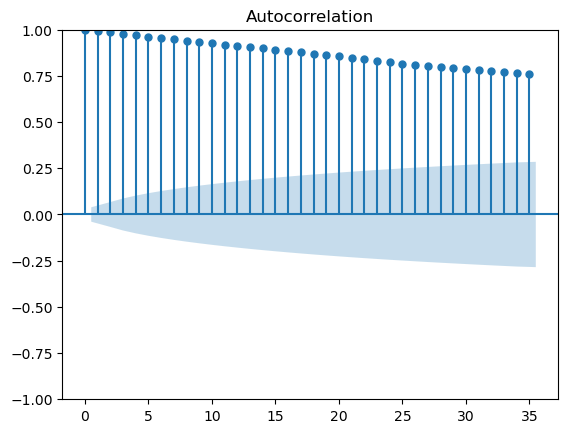

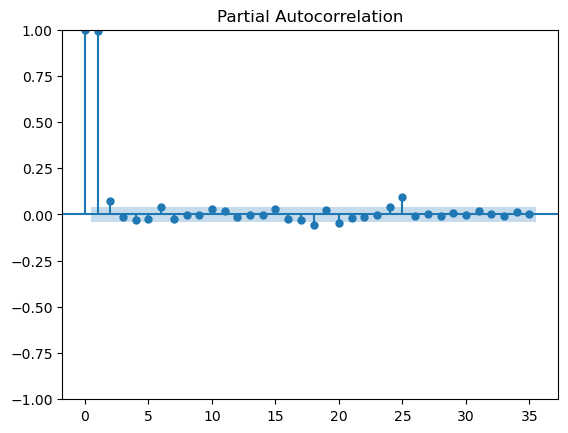

In [71]:
plot_acf(osmo_df)
plot_pacf(osmo_df)
plt.show()

/Users/yoonjiha/anaconda3/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


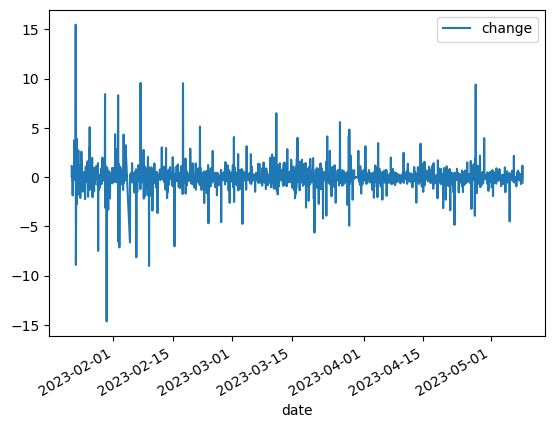

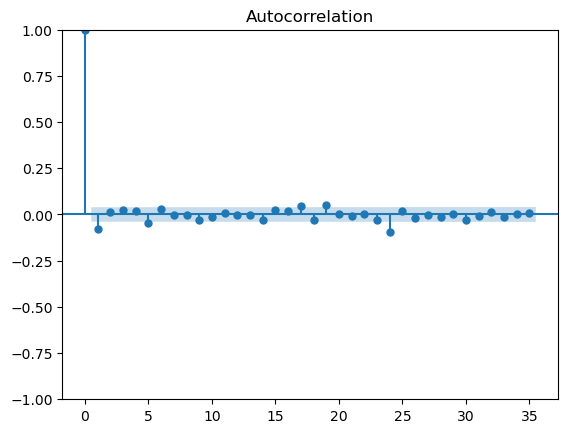

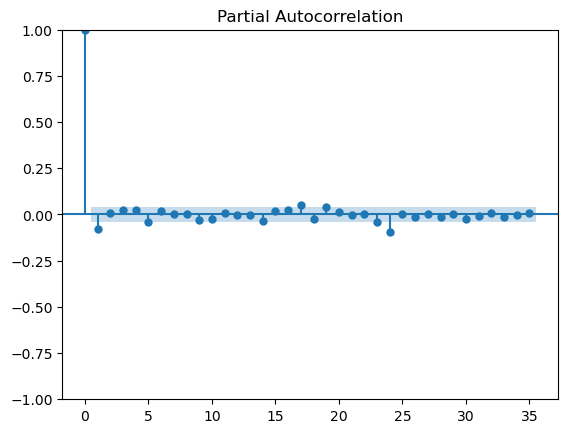

In [72]:
diff_1=osmo_df.diff(periods=1).iloc[1:]
diff_1.plot()
plot_acf(diff_1)
plot_pacf(diff_1)
plt.show() 

In [73]:
from pmdarima.arima import auto_arima

# 파라미터 값 찾기
model_arima = auto_arima(osmo_df,trace=True, error_action='ignore', start_p=1,start_q=1,max_p=5,max_q=5,suppress_warnings=True,stepwise=False,seasonal=False)

model_arima.fit(osmo_df)


 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=7591.409, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=7578.941, Time=0.15 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=7580.086, Time=0.17 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=7580.268, Time=0.27 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=7581.982, Time=0.30 sec
 ARIMA(0,1,5)(0,0,0)[0] intercept   : AIC=7579.916, Time=0.38 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=7578.546, Time=0.12 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=7580.429, Time=0.19 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=7581.097, Time=0.92 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=7582.195, Time=1.53 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=7580.229, Time=0.83 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=7580.354, Time=0.18 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=7581.551, Time=0.71 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=7577.631, Time=1.05 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=7573.571, Time=2.51 sec
 ARIMA(3,1

ARIMA(order=(2, 1, 3), scoring_args={}, suppress_warnings=True)

In [74]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(osmo_df, test_size=0.2, shuffle=False)

In [76]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_predict
import statsmodels.api as sm
import sys

model = SARIMAX(train_df, order=(2,0,3), trend='t')
# trend = t: 시간에 따른 추세 변화 모델링

model_fit = model.fit(full_output = True, disp = 1)
print(model_fit.summary())

/Users/yoonjiha/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yoonjiha/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.55834D+00    |proj g|=  2.32198D+00

At iterate    1    f=  1.55834D+00    |proj g|=  1.85796D+00



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      2     44      2     0     0   1.858D+00   1.558D+00
  F =   1.5583422880053202     

ABNORMAL_TERMINATION_IN_LNSRCH                              
                               SARIMAX Results                                
Dep. Variable:                 change   No. Observations:                 2014
Model:               SARIMAX(2, 0, 3)   Log Likelihood               -3138.501
Date:                Fri, 19 May 2023   AIC                           6291.003
Time:                        00:13:50   BIC                           6330.258
Sample:                     

/Users/yoonjiha/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


<Axes: xlabel='date'>

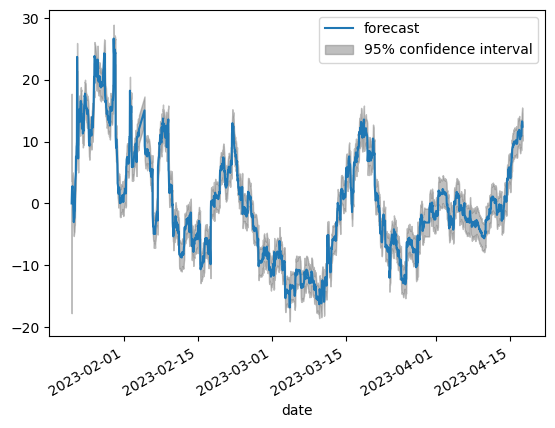

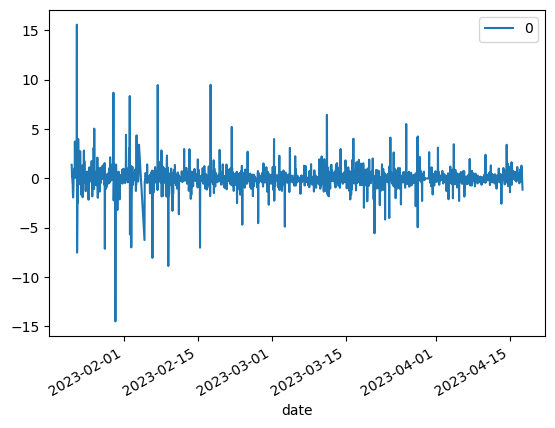

In [77]:
fig, ax = plt.subplots()
fig = plot_predict(model_fit, ax = ax)# 학습데이터 예측 결과
res = pd.DataFrame(model_fit.resid)# 잔차 변동 시각화
res.plot()

In [78]:
# test 데이터 개수만큼 예측값 뽑기
fore = model_fit.get_forecast(steps=len(test_df.index), alpha=0.05).summary_frame()
fore

/Users/yoonjiha/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


change,mean,mean_se,mean_ci_lower,mean_ci_upper
2014,11.239937,1.147682,8.990523,13.489352
2015,11.129076,1.553081,8.085093,14.173059
2016,11.020071,1.881097,7.333188,14.706954
2017,10.953340,2.168791,6.702587,15.204092
2018,10.857576,2.410971,6.132160,15.582993
...,...,...,...,...
2513,-0.255305,9.050693,-17.994338,17.483728
2514,-0.257727,9.050736,-17.996844,17.481391
2515,-0.260132,9.050779,-17.999332,17.479068
2516,-0.262522,9.050820,-18.001804,17.476760


In [79]:
fc = tuple(fore['mean'].values) # 예측값
se = tuple(fore['mean_se'].values) # 표준오차
lower_coef = tuple(fore['mean_ci_lower'].values) # 신뢰구간 최소
upper_coef = tuple(fore['mean_ci_upper'].values) # 신뢰구간 최대

# 예측값 인덱스 넣기
fc_data = pd.Series(fc, index = test_df.index)

# 신뢰구간 인덱스 넣기
lower_data = pd.Series(lower_coef, index = test_df.index)
upper_data = pd.Series(upper_coef, index = test_df.index )

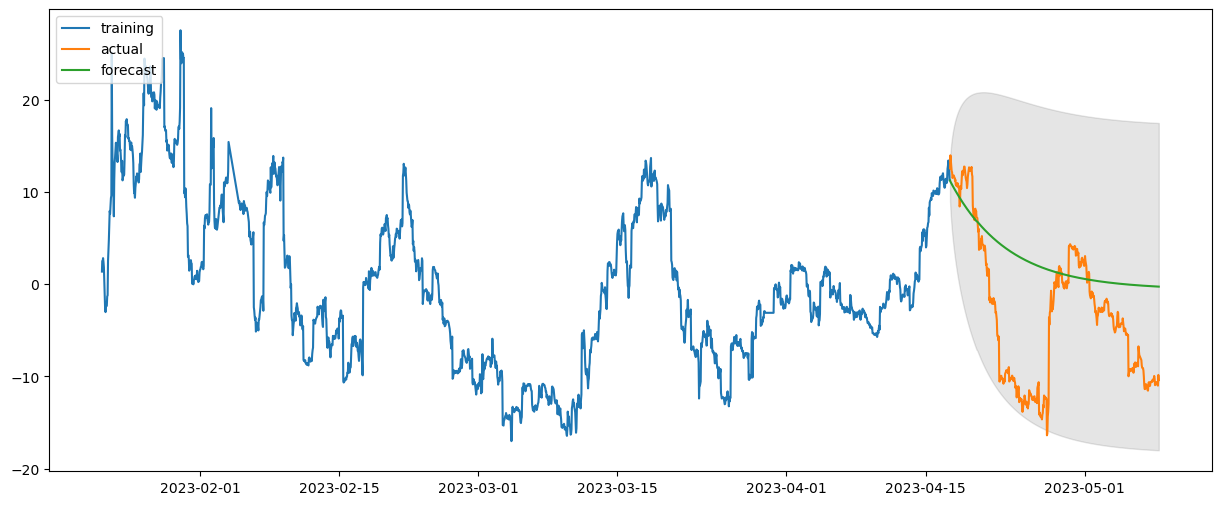

In [80]:
#시각화 
plt.figure(figsize =(15, 6))
plt.plot(train_df, label = 'training')
plt.plot(test_df, label = 'actual')
plt.plot(fc_data, label = 'forecast')
plt.fill_between(test_df.index, lower_data, upper_data, color = 'black', alpha = 0.1)
plt.legend(loc = 'upper left')
plt.show()